In [115]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [116]:
# Data cleaning function
def clean(data):
    data['Mileage'] = data['Mileage'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
    data['Engine'] = data['Engine'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
    data['Power'] = data['Power'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
    #data = data.drop(["Unnamed: 0", 'Name'], axis=1)
    data=data.drop(data.columns[[0, 1, 2, 3, 4, 7, 11]], axis=1)
    data = pd.get_dummies(data, columns=[ 'Fuel_Type', 'Transmission'], drop_first=True)
    return data.dropna()
df = clean(df)
test = clean(test)
print(df)
print(test)


      Mileage  Engine   Power  Price  Fuel_Type_Electric  Fuel_Type_Petrol  \
0       23.84  1199.0   84.00   5.00               False              True   
1       18.49  1493.0  100.00   8.37               False             False   
2       15.00  1598.0  103.52   4.50               False              True   
3       17.20  1396.0   53.50   0.85               False             False   
4       21.02  1248.0   88.76   2.65               False             False   
...       ...     ...     ...    ...                 ...               ...   
3745    11.00  2993.0  235.00  18.75               False             False   
3746    11.79  2179.0  120.00   6.25               False             False   
3747    18.90   998.0   67.10   1.45               False              True   
3748    20.45  1461.0   83.80   6.60               False             False   
3749    18.90   998.0   67.10   2.35               False              True   

      Transmission_Manual  
0                    True  
1      

this is the z normalization of the data 

In [117]:
# Normalize the data

def normalize(col,data):
    mean=data[col].mean()
    std=data[col].std()
    data[col]=(data[col]-mean)/std
coloums=['Mileage', 'Engine', 'Power', "Price"]
for i in coloums:
    normalize(i,df)
    normalize(i,test)

here we convert the data into array and then we separate the target price variable from the rest of the code

In [118]:
# Convert data to numpy arrays
Xdf = df.drop('Price', axis=1).values.astype(float)
Ydf = df['Price'].values.astype(float)
Xte = test.drop('Price', axis=1).values.astype(float)
Yte = test['Price'].values.astype(float)



calculated the r2_score here which is:
r2_score function computes the R² score by calculating the residual sum of squares and the total sum of squares.

In [119]:
def r2_score(act,pred):
    r2 = 1 - np.sum((act - pred) ** 2)  / np.sum((act - np.mean(pred)) ** 2)  
    return r2

here we set an array of zero equal to the coloum of the numeric value 

In [120]:
col = Xdf.shape[1] 
m = len(Ydf)
alpha = 1.0e-1
w = np.zeros(col) 
b = 0 

In [121]:

def rmse(true, pred):
    mse = np.mean((true - pred) ** 2)  # Mean Squared Error
    return np.sqrt(mse) 

gradient descent of multivariate

In [122]:
def gradient_descent(X, y, weight, bias, alpha, number_iter):
    m = len(y) 
    cost_history = []

    for i in range(number_iter+1):
        pred = X.dot(weight) + bias
        errors = pred - y
        dw = (1 / m) * X.T.dot(errors)  
        db = (1 / m) * errors.sum()     
        weight -= alpha * dw
        bias -= alpha * db
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost}")
    return weight, bias, cost_history    
number_iter= 1000
weight, bias, cost_history = gradient_descent(Xdf, Ydf, w, b, alpha, number_iter)

Iteration 0: Cost=0.49986305121884417
Iteration 100: Cost=0.19638106266677752
Iteration 200: Cost=0.19438353606499087
Iteration 300: Cost=0.1939015651619822
Iteration 400: Cost=0.19377465529776491
Iteration 500: Cost=0.1937410711524472
Iteration 600: Cost=0.1937321654162264
Iteration 700: Cost=0.19372979892017164
Iteration 800: Cost=0.19372916870383172
Iteration 900: Cost=0.19372900048723993
Iteration 1000: Cost=0.19372895547938374


here we calculate the r2 and rsme value more like here we function call the things

In [123]:
y_test_pred= Xte.dot(weight) + bias
r2_val = r2_score(Yte, y_test_pred)
print(f"R2 : {r2_val}")
rmse_val = rmse(Yte, y_test_pred)
print(f"RMSE: {rmse_val:.4f}")



R2 : 0.6062274036316146
RMSE: 0.6273


ploting the epoches

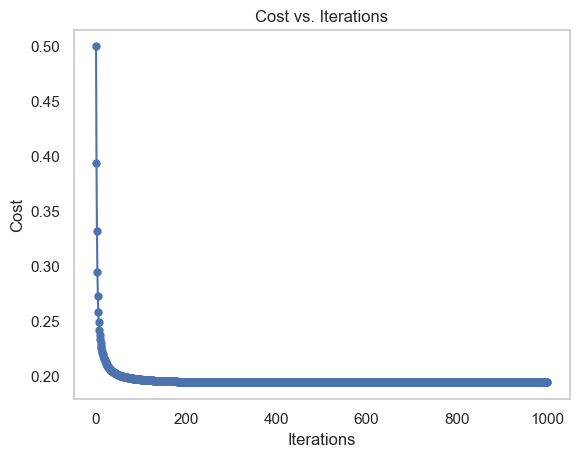

In [124]:
plt.plot(cost_history, color='b',marker='.',ms=10,mec='b')
plt.plot()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid()  
plt.show()

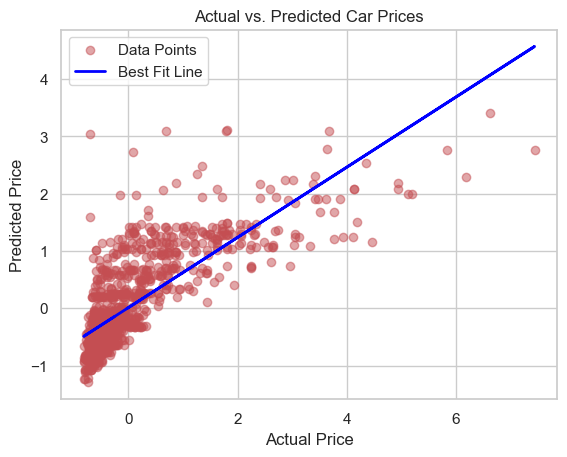

In [125]:
# Scatter plot of Actual vs. Predicted values
plt.scatter(Yte, y_test_pred, color='r', alpha=0.5, label="Data Points")

# Calculate the best-fit line
slope, intercept = np.polyfit(Yte, y_test_pred, 1)  # 1 means a linear fit (line)
best_fit_line = slope * Yte + intercept

# Plot the best-fit line
plt.plot(Yte, best_fit_line, color='blue', label="Best Fit Line", linewidth=2)

# Adding labels, title, and grid
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid
plt.show()
